# XGBoost

In [1]:
import xgboost

In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-1.7.3-py3-none-win_amd64.whl (89.1 MB)


In [2]:
# 관련 파일 임포트

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 위스콘신 유방암 데이터셋

In [ ]:
#데이터 준비

In [3]:
b_cancer = load_breast_cancer()


#b_cancer를 데이터프레임으로 만드시오(cancer_df)
# 마지막열을 "target"으로 명명하고 결과값을 할당한다.

cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
cancer_df["target"] = b_cancer.target

X = b_cancer.data
y = b_cancer.target


# 데이터 분할
# test_size=0.2, random_state=156
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=156)

In [4]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [4]:
### 1. 조기종료 옵션을 사용하지 않는 경우
def get_eval_score(y_test, y_pred, y_pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("-" * 100)
    print("오차행렬:")
    print(confusion)
    print("정확도: {:.4f} 정밀도: {:.4f} 재현율: {:.4f} F1:{:.4f} AUC: {:.4f}".
          format(acc, prec, recall, f1, roc_auc))
    return


In [5]:
### 2. 조기 종료 옵션을 사용한 경우
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1,
              max_depth=3, random_state=156)

xgb.fit(X_train,y_train,eval_metric='error')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=156, ...)

In [9]:
xgb.predict_proba(X_train)[:,1]

array([7.13744434e-03, 9.98060524e-01, 9.99827862e-01, 9.97934818e-01,
       9.78306770e-01, 2.25211754e-02, 9.99943137e-01, 5.45287563e-04,
       6.20016828e-04, 9.98281002e-01, 9.99808609e-01, 9.85859931e-01,
       1.64750572e-02, 1.42928024e-04, 2.30169296e-02, 9.53457177e-01,
       1.21119949e-04, 9.99612033e-01, 4.72913031e-04, 2.99754349e-04,
       9.84542906e-01, 9.99902844e-01, 6.73119284e-05, 2.70408258e-04,
       9.99382854e-01, 9.97849703e-01, 9.99016166e-01, 8.69674981e-03,
       9.46070313e-01, 9.99306679e-01, 1.88976396e-02, 1.60393727e-04,
       9.94483292e-01, 9.97588515e-01, 9.99498367e-01, 9.99754250e-01,
       9.98640001e-01, 9.99017000e-01, 9.97506440e-01, 9.97194767e-01,
       9.98760223e-01, 5.40107314e-04, 9.99962330e-01, 9.98462439e-01,
       9.99873757e-01, 9.98777568e-01, 9.99925375e-01, 9.54499662e-01,
       9.98926103e-01, 9.99853611e-01, 7.90256367e-04, 3.03728152e-02,
       9.99909878e-01, 1.66318612e-03, 9.92135286e-01, 9.99886274e-01,
      

In [12]:
get_eval_score(y_train, xgb.predict(X_train),xgb.predict_proba(X_train)[:,1])
get_eval_score(y_test, xgb.predict(X_test),xgb.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[35  2]
 [ 1 76]]
정확도: 0.9737 정밀도: 0.9744 재현율: 0.9870 F1:0.9806 AUC: 0.9951


In [15]:
### 2. 조기 종료 옵션을 사용한 경우
print(f'https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn')

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn


In [13]:
xgb.fit?

Signature:
xgb.fit(
    X: Any,
    y: Any,
    *,
    sample_weight: Optional[Any] = None,
    base_margin: Optional[Any] = None,
    eval_set: Optional[Sequence[Tuple[Any, Any]]] = None,
    eval_metric: Union[str, Sequence[str], Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]], NoneType] = None,
    early_stopping_rounds: Optional[int] = None,
    verbose: Union[bool, int, NoneType] = True,
    xgb_model: Union[xgboost.core.Booster, str, xgboost.sklearn.XGBModel, NoneType] = None,
    sample_weight_eval_set: Optional[Sequence[Any]] = None,
    base_margin_eval_set: Optional[Sequence[Any]] = None,
    feature_weights: Optional[Any] = None,
    callbacks: Optional[Sequence[xgboost.callback.TrainingCallback]] = None,
) -> 'XGBClassifier'
Docstring:
Fit gradient boosting classifier.

Note that calling ``fit()`` multiple times will cause the model object to be
re-fit from scratch. To resume training from a previous checkpoint, explicitly
pass ``xgb_model`` argument.

Pa

In [ ]:
* 하이퍼파라미터 튜닝( 조기종료 옵션 사용)

In [18]:
xgb2 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

xgb2.fit(X_train,y_train,
         early_stopping_rounds=100,
         eval_metric='logloss',
         eval_set =[(X_test,y_test)],
         verbose=True)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
xgb2.best_iteration

211

In [21]:
# 조기종료 모델에 대한 평가(early_stopping_rounds:100)

get_eval_score(y_train,xgb2.predict(X_train),
               xgb2.predict_proba(X_train)[:,1])

get_eval_score(y_test,xgb2.predict(X_test),
               xgb2.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[34  3]
 [ 1 76]]
정확도: 0.9649 정밀도: 0.9620 재현율: 0.9870 F1:0.9744 AUC: 0.9954


In [ ]:
# 조기종료 모델 구축 및 평가(early_stopping_rounds=10)

In [22]:
xgb3 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

xgb3.fit(X_train,y_train,
         early_stopping_rounds=10,
         eval_metric='logloss',
         eval_set =[(X_test,y_test)],
         verbose=True)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
xgb3.best_iteration

52

In [25]:
get_eval_score(y_train,xgb3.predict(X_train),
               xgb3.predict_proba(X_train)[:,1])

get_eval_score(y_test,xgb3.predict(X_test),
               xgb3.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[173   2]
 [  0 280]]
정확도: 0.9956 정밀도: 0.9929 재현율: 1.0000 F1:0.9964 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[34  3]
 [ 2 75]]
정확도: 0.9561 정밀도: 0.9615 재현율: 0.9740 F1:0.9677 AUC: 0.9947


* 시각화

In [26]:
xgb.feature_importances_

array([2.46031978e-03, 1.35654025e-02, 0.00000000e+00, 9.27082635e-03,
       5.80104906e-03, 5.30546298e-03, 4.85472009e-03, 6.19234182e-02,
       2.57423351e-04, 2.64376751e-03, 1.28095504e-02, 1.51770329e-03,
       1.25871552e-02, 7.57828820e-03, 1.32917305e-02, 2.99597043e-03,
       1.81596819e-02, 2.11023865e-03, 7.51956599e-04, 1.97035517e-03,
       5.04537642e-01, 1.58287659e-02, 1.46945506e-01, 3.72597985e-02,
       9.13425907e-03, 1.40398964e-02, 1.18089542e-02, 7.33294934e-02,
       2.05578189e-03, 5.20498073e-03], dtype=float32)

In [27]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

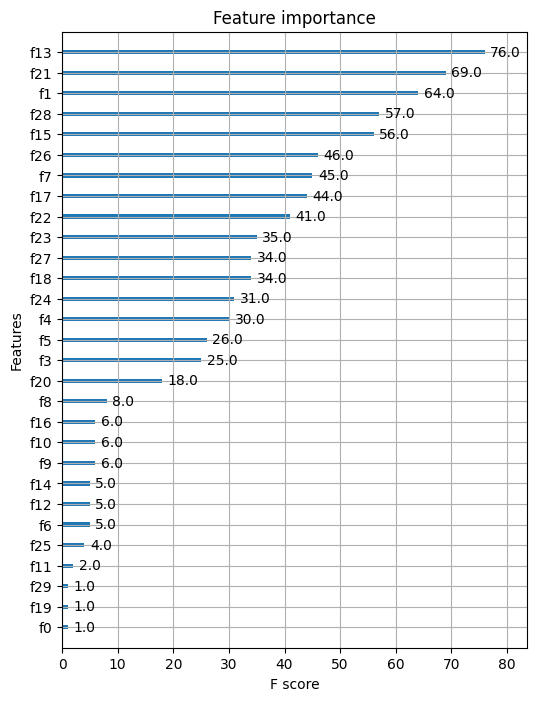

In [33]:
# 1)  xgboost가 제공하는 Plot_importance
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(6,8))
plot_importance(xgb, ax=ax);

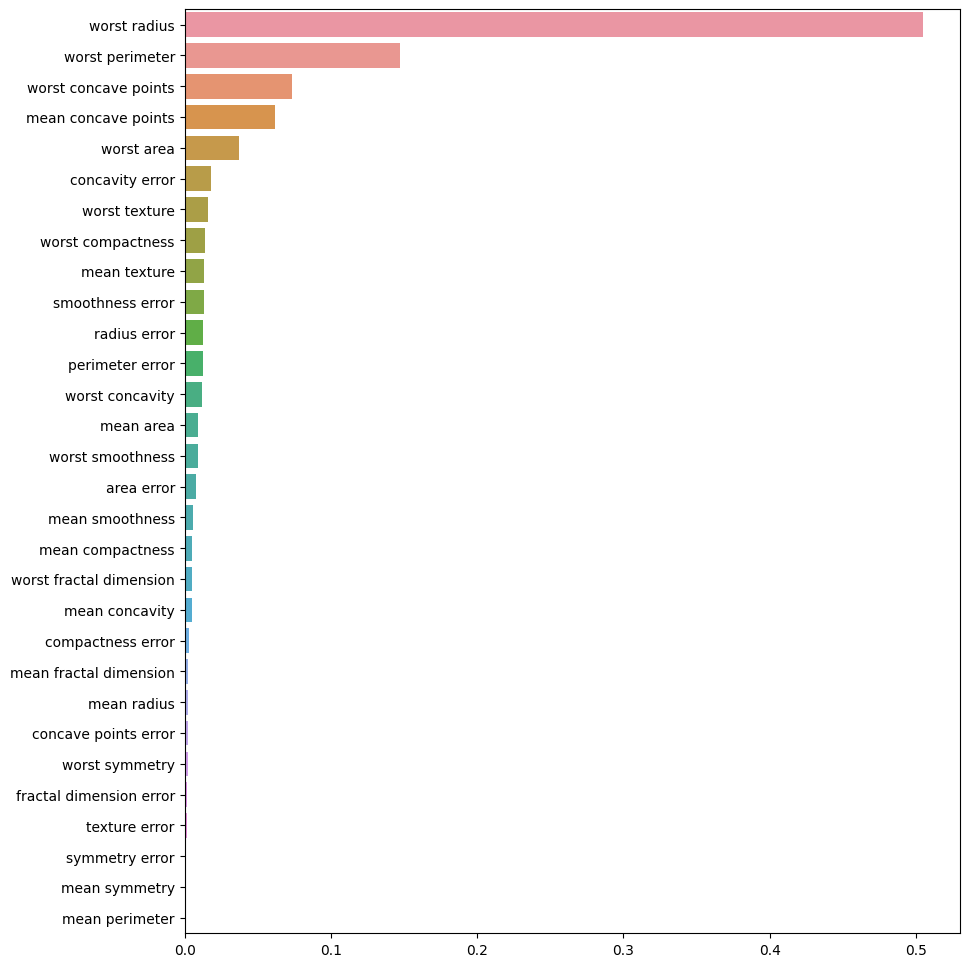

In [34]:
# 2) pandas Series를 활용하는 경우

f_imp = pd.Series(xgb.feature_importances_,index=b_cancer.feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=f_imp.values, y=f_imp.index);

In [35]:
xgb.feature_importances_?

Type:        property
String form: <property object at 0x000001740BC59040>
Docstring:  
Feature importances property, return depends on `importance_type`
parameter. When model trained with multi-class/multi-label/multi-target dataset,
the feature importance is "averaged" over all targets. The "average" is defined
based on the importance type. For instance, if the importance type is
"total_gain", then the score is sum of loss change for each split from all
trees.

Returns
-------
feature_importances_ : array of shape ``[n_features]`` except for multi-class
linear model, which returns an array with shape `(n_features, n_classes)`

# LightGBM(LGBM)

In [36]:
import lightgbm

In [ ]:
#!pip install lightgbm

In [38]:
lightgbm.__version__

'3.3.5'

## 위스콘신 유방암 데이터셋

In [39]:
from sklearn.model_selection import train_test_split
cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
cancer_df["target"] = b_cancer.target

X = b_cancer.data
y = b_cancer.target


# 데이터 분할
# test_size=0.2, random_state=156

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=156)


In [40]:
# 조기 중단 옵션을 사용하지 않은 경우
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 400, device = 'gpu')



In [41]:
# 조기중단 옵션을 사용한 경우

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400, device = 'gpu' , random_state = 156)

lgbm.fit(X_train,y_train,early_stopping_rounds=100,
         eval_metric='logloss',
         eval_set=[(X_test,y_test)],
         verbose=True)


[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507435
[3]	valid_0's binary_logloss: 0.45847
[4]	valid_0's binary_logloss: 0.417538
[5]	valid_0's binary_logloss: 0.385558
[6]	valid_0's binary_logloss: 0.355819
[7]	valid_0's binary_logloss: 0.329636
[8]	valid_0's binary_logloss: 0.308521
[9]	valid_0's binary_logloss: 0.285438
[10]	valid_0's binary_logloss: 0.267094
[11]	valid_0's binary_logloss: 0.252049
[12]	valid_0's binary_logloss: 0.237053
[13]	valid_0's binary_logloss: 0.224793
[14]	valid_0's binary_logloss: 0.21342
[15]	valid_0's binary_logloss: 0.203136
[16]	valid_0's binary_logloss: 0.194086
[17]	valid_0's binary_logloss: 0.186484
[18]	valid_0's binary_logloss: 0.179175
[19]	valid_0's binary_logloss: 0.174072
[20]	valid_0's binary_logloss: 0.167222
[21]	valid_0's binary_logloss: 0.162555
[22]	valid_0's binary_logloss: 0.15694
[23]	valid_0's binary_logloss: 0.153451
[24]	valid_0's binary_logloss: 0.151742
[25]	valid_0's binary_logloss: 0.148999
[26]	valid_0

LGBMClassifier(device='gpu', n_estimators=400, random_state=156)

In [43]:
get_eval_score(y_train,lgbm.predict(X_train),lgbm.predict_proba(X_train)[:,1])

get_eval_score(y_test,lgbm.predict(X_test),lgbm.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[33  4]
 [ 1 76]]
정확도: 0.9561 정밀도: 0.9500 재현율: 0.9870 F1:0.9682 AUC: 0.9930


In [ ]:
# 시각화

In [48]:
from lightgbm import plot_importance

plt.figure(figsize = (6,8))
plot_importance(lgbm,ax=ax);

<Figure size 600x800 with 0 Axes>

<AxesSubplot: >

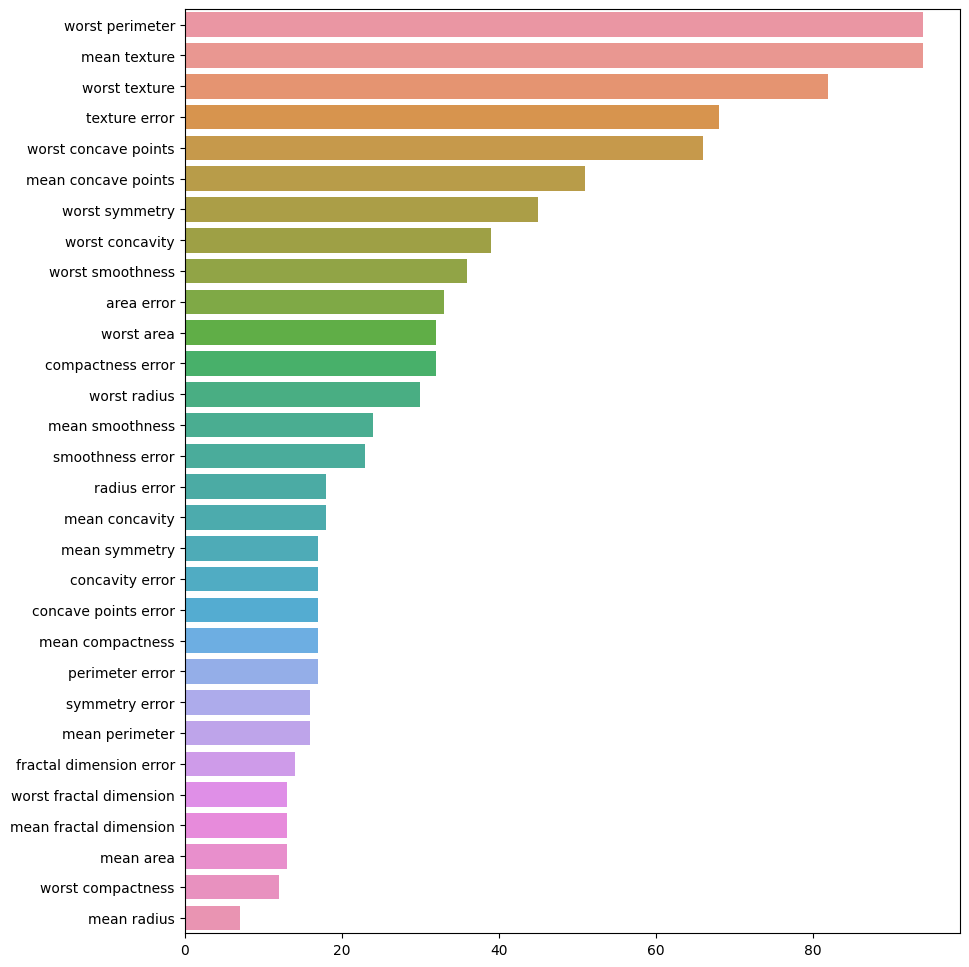

In [54]:
f_imp = pd.Series(lgbm.feature_importances_,
                  index=b_cancer.feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x = f_imp.values, y = f_imp.index)


## CatBoosting

In [56]:
import catboost

In [58]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()

cb.fit(X_train,y_train)

Learning rate set to 0.00736
0:	learn: 0.6822080	total: 149ms	remaining: 2m 28s
1:	learn: 0.6701892	total: 153ms	remaining: 1m 16s
2:	learn: 0.6582069	total: 156ms	remaining: 52s
3:	learn: 0.6477444	total: 163ms	remaining: 40.5s
4:	learn: 0.6358579	total: 168ms	remaining: 33.4s
5:	learn: 0.6268188	total: 172ms	remaining: 28.5s
6:	learn: 0.6157044	total: 177ms	remaining: 25.1s
7:	learn: 0.6067152	total: 181ms	remaining: 22.5s
8:	learn: 0.5951292	total: 187ms	remaining: 20.6s
9:	learn: 0.5863460	total: 192ms	remaining: 19s
10:	learn: 0.5766764	total: 197ms	remaining: 17.7s
11:	learn: 0.5668565	total: 201ms	remaining: 16.5s
12:	learn: 0.5578108	total: 209ms	remaining: 15.8s
13:	learn: 0.5492647	total: 213ms	remaining: 15s
14:	learn: 0.5411062	total: 217ms	remaining: 14.2s
15:	learn: 0.5330370	total: 224ms	remaining: 13.8s
16:	learn: 0.5257171	total: 230ms	remaining: 13.3s
17:	learn: 0.5179772	total: 235ms	remaining: 12.8s
18:	learn: 0.5092588	total: 242ms	remaining: 12.5s
19:	learn: 0.501

In [59]:
get_eval_score(y_test,cb.predict(X_test),cb.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[33  4]
 [ 0 77]]
정확도: 0.9649 정밀도: 0.9506 재현율: 1.0000 F1:0.9747 AUC: 0.9951
